# Reading TREx RGB full-colour raw image data

Below we'll retrieve several different types of TREx RGB data, read them, and do a bit of processing. An internet connection is required since we'll need to download data.

## Retrieve a minute of data

In [1]:
import requests

In [2]:
# 2020-03-21 06:30 UTC in Gillam, Manitoba, was a particularly good night
url = "https://data.phys.ucalgary.ca/sort_by_project/TREx/RGB/stream0/2020/03/21/gill_rgb-04/ut06/20200321_0630_gill_rgb-04_full.h5"
r = requests.get(url)

In [3]:
# save data to a local file
filename = "20200321_0630_gill_rgb-04_full.h5"
with open(filename, 'wb') as f:
    f.write(r.content)

## Read the data file

In [4]:
import trex_imager_readfile

In [5]:
img, meta, problematic_files = trex_imager_readfile.read_rgb(filename)

In [6]:
# the imager takes a picture every 3 seconds, so a 1-minute file usually contains 20 images
print("Image dimensions: %d x %d (%d channels)" % (img.shape[0], img.shape[1], img.shape[2]))
print("Number of images: %d" % (img.shape[3]))

Image dimensions: 480 x 553 (3 channels)
Number of images: 20


In [7]:
# data for the first image
img[:,:,:,0]

array([[[8, 7, 8],
        [7, 7, 6],
        [5, 5, 4],
        ...,
        [4, 6, 7],
        [4, 6, 5],
        [4, 5, 4]],

       [[5, 6, 7],
        [4, 6, 5],
        [4, 5, 4],
        ...,
        [5, 6, 5],
        [6, 6, 5],
        [3, 4, 5]],

       [[4, 6, 5],
        [3, 6, 5],
        [5, 8, 6],
        ...,
        [6, 5, 4],
        [6, 7, 6],
        [6, 6, 7]],

       ...,

       [[5, 6, 4],
        [6, 7, 4],
        [5, 6, 5],
        ...,
        [5, 4, 5],
        [4, 4, 4],
        [3, 4, 4]],

       [[5, 5, 5],
        [7, 5, 7],
        [5, 4, 4],
        ...,
        [6, 6, 6],
        [4, 5, 5],
        [5, 6, 6]],

       [[5, 6, 6],
        [6, 6, 6],
        [5, 5, 5],
        ...,
        [5, 5, 6],
        [5, 6, 6],
        [3, 5, 6]]], dtype=uint8)

In [8]:
# metadata for first image
meta[0]

{'aperture': '4.0',
 'camera_environment_temperature': '19.56 C',
 'camera_serial': '072722600030',
 'exposure_length': '3 seconds',
 'gain': '30.0 dB',
 'geographic_latitude': '56.376723',
 'geographic_longitude': '-94.643664',
 'imager_unique_id': 'rgb-04',
 'lens_serial': '6710000336',
 'ntp_delay': '0.000',
 'ntp_jitter': '13.217',
 'ntp_offset': '5.664',
 'ntp_target': '127.127.20.0',
 'project_unique_id': 'trex',
 'site_unique_id': 'gill',
 'white_balance': '4000 Kelvin',
 'image_effective_end_timestamp': '2020-03-21 06:30:02.732627 UTC',
 'image_effective_exposure_length': '00:00:02.559847 ms',
 'image_request_start_timestamp': '2020-03-21 06:30:00.172780 UTC',
 'mode_unique_id': 'full',
 'num_averaged_subframes': '8',
 'shutter_state': 'unknown'}

## Visualize the image

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

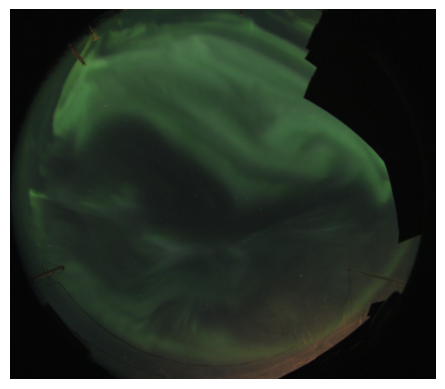

In [10]:
plt.imshow(img[:,:,:,0])
plt.axis("off")
plt.show() 

# Let's scale the image so it's a bit brighter

Next we'll scale the image using a linear scale with a min and max cut-off. This allows us to easily brighten the image while not increasing the CCD readout noise.

In [11]:
import numpy as np

scale_min = 10.0   # MUST be a float
scale_max = 120.0  # MUST be a float

scale_diff = scale_max - scale_min
scale_ratio = 255.0 / scale_diff
im_scaled = (img[:,:,:,0] - scale_min) * scale_ratio  # apply scale
im_scaled = im_scaled.clip(0, 255) + 0.5              # limit to 0-255 (the range of an 8-bit image)
im_scaled = im_scaled.astype(np.uint8)                # convert data type to 8-bit

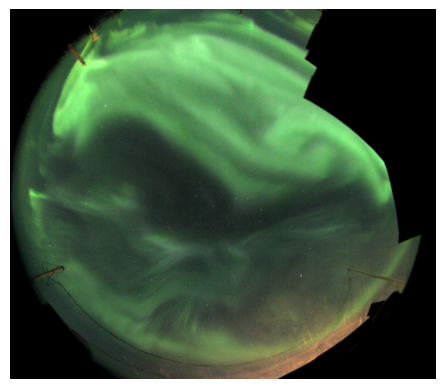

In [12]:
# display the scaled image
plt.imshow(im_scaled)
plt.axis("off")
plt.show() 

## Cleanup downloaded file

In [13]:
# remove the downloaded files
import os
os.remove(filename)